## Building Volume

Loading building volume data...
Data shape: (115, 2)
Columns: [1269, 4668]

Residential column: '1269'
Commercial column: '4668'

After cleaning:
Residential buildings: 114
Commercial buildings: 19

Figure saved to: /Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Volume.png


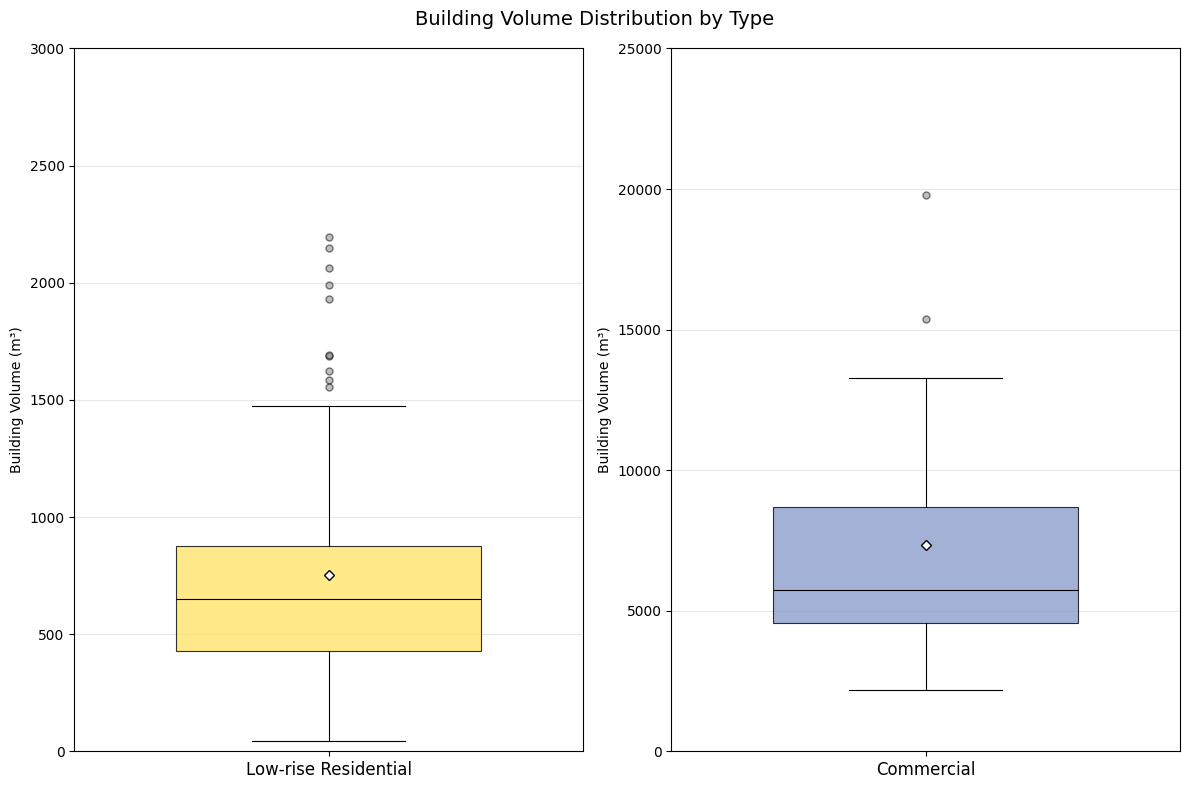


BUILDING VOLUME STATISTICS

LOW-RISE RESIDENTIAL BUILDINGS (Color: #ffe46c)
----------------------------------------
Count:        114
Mean:         751.2 m³
Median:       649.0 m³
Min:          45.0 m³
Max:          2,197.0 m³
Std Dev:      461.3 m³
Q1 (25%):     427.2 m³
Q3 (75%):     875.5 m³
IQR:          448.2 m³

COMMERCIAL BUILDINGS (Color: #8c9ecc)
----------------------------------------
Count:        19
Mean:         7,354.4 m³
Median:       5,721.0 m³
Min:          2,194.0 m³
Max:          19,781.0 m³
Std Dev:      4,452.9 m³
Q1 (25%):     4,565.0 m³
Q3 (75%):     8,706.0 m³
IQR:          4,141.0 m³

COMPARISON SUMMARY
Average volume difference: 6,603.3 m³
Commercial buildings are on average 9.8x larger than residential

Statistics saved to: /Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Volume_statistics.csv


In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def create_building_volume_boxplots(excel_path, output_path=None):
    """
    Create box plots for building volumes of residential and commercial buildings
    with separate y-axes due to large scale differences
    
    Parameters:
    -----------
    excel_path : str
        Path to the Excel file containing building volumes
    output_path : str, optional
        Path to save the figure
    """
    
    # Load the Excel file
    print("Loading building volume data...")
    df = pd.read_excel(excel_path)
    
    print(f"Data shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Get column names (adjust these based on actual column names)
    # Assuming columns are something like 'Residential' and 'Commercial'
    # You can modify these based on the actual column names
    col_residential = df.columns[0]  # First column
    col_commercial = df.columns[1]   # Second column
    
    print(f"\nResidential column: '{col_residential}'")
    print(f"Commercial column: '{col_commercial}'")
    
    # Convert to numeric and remove any NaN values
    residential_volumes = pd.to_numeric(df[col_residential], errors='coerce').dropna()
    commercial_volumes = pd.to_numeric(df[col_commercial], errors='coerce').dropna()
    
    print(f"\nAfter cleaning:")
    print(f"Residential buildings: {len(residential_volumes)}")
    print(f"Commercial buildings: {len(commercial_volumes)}")
    
    # Check if we have data
    if len(residential_volumes) == 0 or len(commercial_volumes) == 0:
        print("\nError: No valid numeric data found in one or both columns.")
        print("Sample data from original dataframe:")
        print(df.head())
        return None, None
    
    # Convert to numpy arrays to ensure numeric type
    residential_volumes = residential_volumes.values.astype(float)
    commercial_volumes = commercial_volumes.values.astype(float)
    
    # CUSTOMIZE THESE COLORS AS NEEDED
    color_residential = '#ffe46c'  # CHANGE THIS
    color_commercial = '#8c9ecc'   # Teal - CHANGE THIS
    
    # CUSTOMIZE Y-AXIS LIMITS HERE
    y_lim_residential = [0, 3000]  # CHANGE THESE VALUES AS NEEDED
    y_lim_commercial = [0, 25000]  # CHANGE THESE VALUES AS NEEDED
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    
    # Plot residential on left axis
    bp1 = ax1.boxplot([residential_volumes], 
                      labels=['Low-rise\nResidential'],
                      patch_artist=True,
                      widths=0.6,
                      showmeans=True,
                      meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                      medianprops=dict(color='black', linewidth=0.8),
                      boxprops=dict(linewidth=0.8),
                      whiskerprops=dict(linewidth=0.8),
                      capprops=dict(linewidth=0.8),
                      flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))
    
    # Fill residential box with color
    bp1['boxes'][0].set_facecolor(color_residential)
    bp1['boxes'][0].set_alpha(0.8)
    
    # Plot commercial on right axis
    bp2 = ax2.boxplot([commercial_volumes], 
                      labels=['Commercial'],
                      patch_artist=True,
                      widths=0.6,
                      showmeans=True,
                      meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                      medianprops=dict(color='black', linewidth=0.8),
                      boxprops=dict(linewidth=0.8),
                      whiskerprops=dict(linewidth=0.8),
                      capprops=dict(linewidth=0.8),
                      flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))
    
    # Fill commercial box with color
    bp2['boxes'][0].set_facecolor(color_commercial)
    bp2['boxes'][0].set_alpha(0.8)
    
    # Set y-axis limits
    ax1.set_ylim(y_lim_residential)
    ax2.set_ylim(y_lim_commercial)
    
    # Customize axes
    ax1.set_ylabel('Building Volume (m³)', fontsize=10)
    ax2.set_ylabel('Building Volume (m³)', fontsize=10)
    
    # Add grid
    ax1.grid(True, axis='y', alpha=0.3)
    ax2.grid(True, axis='y', alpha=0.3)
    
    # Add sample sizes to labels
    ax1.set_xticklabels([f'Low-rise Residential'], fontsize=12)
    ax2.set_xticklabels([f'Commercial'], fontsize=12)
    
    # Overall title
    fig.suptitle('Building Volume Distribution by Type', fontsize=14, y=0.98)
    
    plt.tight_layout()
    
    # Save if output path provided
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"\nFigure saved to: {output_path}")
    
    plt.show()
    
    # Calculate comprehensive statistics
    print("\n" + "="*60)
    print("BUILDING VOLUME STATISTICS")
    print("="*60)
    
    statistics = {}
    
    # Convert back to pandas Series for statistics calculation
    residential_series = pd.Series(residential_volumes)
    commercial_series = pd.Series(commercial_volumes)
    
    # Define colors list for statistics
    colors = [color_residential, color_commercial]
    
    for name, data, color in zip(['Low-rise Residential', 'Commercial'], 
                                  [residential_series, commercial_series],
                                  colors):
        stats = {
            'Count': len(data),
            'Mean': data.mean(),
            'Median': data.median(),
            'Min': data.min(),
            'Max': data.max(),
            'Std Dev': data.std(),
            'Q1 (25%)': data.quantile(0.25),
            'Q3 (75%)': data.quantile(0.75),
            'IQR': data.quantile(0.75) - data.quantile(0.25),
            'Color': color
        }
        statistics[name] = stats
        
        print(f"\n{name.upper()} BUILDINGS (Color: {color})")
        print("-" * 40)
        print(f"Count:        {stats['Count']:,}")
        print(f"Mean:         {stats['Mean']:,.1f} m³")
        print(f"Median:       {stats['Median']:,.1f} m³")
        print(f"Min:          {stats['Min']:,.1f} m³")
        print(f"Max:          {stats['Max']:,.1f} m³")
        print(f"Std Dev:      {stats['Std Dev']:,.1f} m³")
        print(f"Q1 (25%):     {stats['Q1 (25%)']:,.1f} m³")
        print(f"Q3 (75%):     {stats['Q3 (75%)']:,.1f} m³")
        print(f"IQR:          {stats['IQR']:,.1f} m³")
    
    # Create comparison summary
    print("\n" + "="*60)
    print("COMPARISON SUMMARY")
    print("="*60)
    
    res_mean = statistics['Low-rise Residential']['Mean']
    com_mean = statistics['Commercial']['Mean']
    
    print(f"Average volume difference: {abs(res_mean - com_mean):,.1f} m³")
    print(f"Commercial buildings are on average {com_mean/res_mean:.1f}x larger than residential")
    
    # Create a summary DataFrame
    summary_df = pd.DataFrame(statistics).T
    
    # Save statistics to CSV if output path provided
    if output_path:
        stats_path = output_path.replace('.png', '_statistics.csv')
        summary_df.to_csv(stats_path)
        print(f"\nStatistics saved to: {stats_path}")
    
    return summary_df, statistics

def create_violin_plots(excel_path, output_path=None):
    """
    Alternative visualization using violin plots for better distribution visualization
    """
    # Load data
    df = pd.read_excel(excel_path)
    
    col_residential = df.columns[0]
    col_commercial = df.columns[1]
    
    # Convert to numeric and remove NaN values
    residential_volumes = pd.to_numeric(df[col_residential], errors='coerce').dropna()
    commercial_volumes = pd.to_numeric(df[col_commercial], errors='coerce').dropna()
    
    # Check if we have data
    if len(residential_volumes) == 0 or len(commercial_volumes) == 0:
        print("Error: No valid numeric data found.")
        return
    
    # CUSTOMIZE THESE COLORS
    color_residential = '#ffe46c'  # CHANGE THIS
    color_commercial = '#8c9ecc'   # CHANGE THIS
    
    # Prepare data for violin plot
    data = pd.DataFrame({
        'Building Type': ['Low-rise Residential'] * len(residential_volumes) + ['Commercial'] * len(commercial_volumes),
        'Volume': pd.concat([residential_volumes, commercial_volumes])
    })
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Create violin plot
    parts = ax.violinplot([residential_volumes, commercial_volumes], 
                          positions=[1, 2],
                          showmeans=True,
                          showextrema=True,
                          showmedians=True)
    
    # Customize colors
    colors = [color_residential, color_commercial]
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.8)
    
    # Customize other elements
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
        if partname in parts:
            vp = parts[partname]
            vp.set_edgecolor('black')
            vp.set_linewidth(1.5)
    
    # Labels and title
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Low-rise\nResidential', 'Commercial'], fontsize=12)
    ax.set_ylabel('Building Volume (m³)', fontsize=10)
    ax.set_title('Building Volume Distribution (Violin Plot)', fontsize=14)
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    if output_path:
        violin_path = output_path.replace('.png', '_violin.png')
        plt.savefig(violin_path, dpi=300, bbox_inches='tight')
        print(f"\nViolin plot saved to: {violin_path}")
    
    plt.show()

# Example usage
if __name__ == "__main__":
    # Set your paths
    excel_path = "/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Volume.xlsx"
    output_path = "/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Volume.png"
    
    # Create box plots and get statistics
    summary_df, stats = create_building_volume_boxplots(
        excel_path,
        output_path
    )
    
    # Optional: Create violin plot for alternative visualization
    # create_violin_plots(excel_path, output_path)

## Electricity

In [9]:
import contextily as ctx
import datetime
import geopandas as gpd
import libpysal
import numpy as np
import os
import pandas as pd
import plotly.express as px
import pysal.lib
import seaborn as sns
import time
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union

In [55]:
xls = pd.read_excel(os.path.join(os.getcwd(), r'/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Types/Building Electricity EUI.xlsx'))
xls.head(10)

,Residential,Residential.1,Residential.2,Residential.3,Commercial,Commercial.1,Commercial.2,Commercial.3
0,Spring,Summer,Fall,Winter,Spring,Summer,Fall,Winter
1,6.38,9.92,11.5,12,8.45,14.23,11.43,11.48
2,6.12,7.21,12,12.55,7.23,17.13,8.45,12.39
3,7.13,7.78,3.71,4.93,11.54,13.89,10.3,8.48
4,9.54,6.91,10.39,11.37,12.04,11.65,12.44,9.92
5,4.39,8.23,12.28,6.23,6.81,12.47,8.77,10.58
6,5.11,8.43,13.51,11.53,10.33,10.83,7.61,11.71
7,4.82,7.6,2.47,5.51,9.63,16.48,8.83,8.54
8,3.81,11.23,10.35,15.71,8.39,14.21,11.52,9.93
9,6.91,10.21,8.92,2.56,8.27,15.99,12.26,11.59


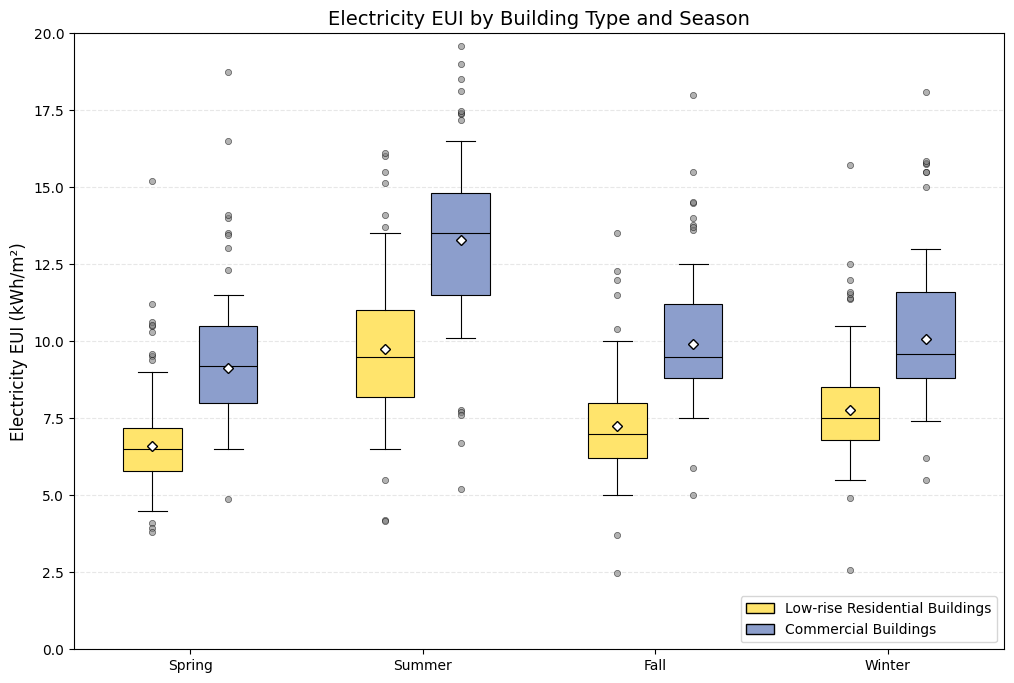


SUMMARY STATISTICS
Residential Annual Avg: 9.26 kWh/m²
Commercial Annual Avg:  10.80 kWh/m²
Difference: 1.55 (16.7% higher)

Seasonal Variation:
  Residential: Winter is 1.5x higher than Summer
  Commercial:  Winter is 0.8x higher than Summer

Total outliers — Residential: 36, Commercial: 20


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# ==============================
# STEP 1: READ THE EXCEL FILE
# ==============================

# Your Excel file name
excel_file = "/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Types/Building Electricity EUI.xlsx"

# Read with multi-level headers (Row 1 = type, Row 2 = season)
df = pd.read_excel(excel_file, header=[0, 1])

# Drop completely empty rows (if any)
df = df.dropna(how='all')

# ==============================
# STEP 2: BUILD DATA DICTIONARIES
# ==============================

# Prepare structure
seasonal_data = {}
outliers = {}

# Extract unique seasons and building types
seasons = df.columns.get_level_values(1).unique().tolist()
building_types = df.columns.get_level_values(0).unique().tolist()

# Fill the dictionaries
for season in seasons:
    seasonal_data[season] = {}
    outliers[season] = {}
    for btype in building_types:
        # Get numeric values from that column
        vals = df[(btype, season)].dropna().tolist()
        
        # First 5 are main boxplot data, rest are outliers (as per your structure)
        main_data = vals[:5]
        outlier_data = vals[5:]
        
        seasonal_data[season][btype] = main_data
        outliers[season][btype] = outlier_data

# ==============================
# STEP 3: CREATE BOXPLOTS
# ==============================

fig, ax = plt.subplots(figsize=(12, 8))

residential_data = []
commercial_data = []
residential_outliers = []
commercial_outliers = []
positions_residential = []
positions_commercial = []

season_centers = [1, 3, 5, 7]
box_width = 0.5
box_spacing = 0.15

# Enforce consistent order
ordered_seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for i, season in enumerate(ordered_seasons):
    res_data = seasonal_data[season]['Residential']
    com_data = seasonal_data[season]['Commercial']
    residential_data.append(res_data)
    commercial_data.append(com_data)
    residential_outliers.append(outliers[season]['Residential'])
    commercial_outliers.append(outliers[season]['Commercial'])
    
    pos_res = season_centers[i] - box_width/2 - box_spacing/2
    pos_com = season_centers[i] + box_width/2 + box_spacing/2
    positions_residential.append(pos_res)
    positions_commercial.append(pos_com)

# Residential boxplot
bp1 = ax.boxplot(residential_data, positions=positions_residential, widths=box_width,
                 patch_artist=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                 medianprops=dict(color='black', linewidth=0.4),
                 boxprops=dict(linewidth=0.8),
                 whiskerprops=dict(linewidth=0.8),
                 capprops=dict(linewidth=0.8),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5),
                 whis=[0, 100], manage_ticks=False)

# Commercial boxplot
bp2 = ax.boxplot(commercial_data, positions=positions_commercial, widths=box_width,
                 patch_artist=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                 medianprops=dict(color='black', linewidth=0.4),
                 boxprops=dict(linewidth=0.8),
                 whiskerprops=dict(linewidth=0.8),
                 capprops=dict(linewidth=0.8),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5),
                 whis=[0, 100], manage_ticks=False)

# Add outliers manually
for i in range(len(ordered_seasons)):
    if residential_outliers[i]:
        ax.scatter([positions_residential[i]] * len(residential_outliers[i]),
                   residential_outliers[i], color='gray', alpha=0.6, s=20,
                   zorder=3, edgecolors='black', linewidths=0.5)
    if commercial_outliers[i]:
        ax.scatter([positions_commercial[i]] * len(commercial_outliers[i]),
                   commercial_outliers[i], color='gray', alpha=0.6, s=20,
                   zorder=3, edgecolors='black', linewidths=0.5)

# Colors and style
for patch in bp1['boxes']:
    patch.set_facecolor('#ffe46c')
for patch in bp2['boxes']:
    patch.set_facecolor('#8c9ecc')

ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(season_centers)
ax.set_xticklabels(ordered_seasons)
ax.set_ylabel('Electricity EUI (kWh/m²)', fontsize=12)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_title('Electricity EUI by Building Type and Season', fontsize=14)

legend_elements = [
    Patch(facecolor='#ffe46c', edgecolor='black', label='Low-rise Residential Buildings'),
    Patch(facecolor='#8c9ecc', edgecolor='black', label='Commercial Buildings')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, fancybox=True)

plt.savefig('Electricity_eui_building_types.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# STEP 4: PRINT STATISTICS
# ==============================

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

res_annual_avg = np.mean([np.median(seasonal_data[s]['Residential']) for s in ordered_seasons])
com_annual_avg = np.mean([np.median(seasonal_data[s]['Commercial']) for s in ordered_seasons])

print(f"Residential Annual Avg: {res_annual_avg:.2f} kWh/m²")
print(f"Commercial Annual Avg:  {com_annual_avg:.2f} kWh/m²")
print(f"Difference: {com_annual_avg - res_annual_avg:.2f} ({((com_annual_avg - res_annual_avg)/res_annual_avg)*100:.1f}% higher)")

winter_res = np.median(seasonal_data['Winter']['Residential'])
summer_res = np.median(seasonal_data['Summer']['Residential'])
winter_com = np.median(seasonal_data['Winter']['Commercial'])
summer_com = np.median(seasonal_data['Summer']['Commercial'])

print("\nSeasonal Variation:")
print(f"  Residential: Winter is {winter_res/summer_res:.1f}x higher than Summer")
print(f"  Commercial:  Winter is {winter_com/summer_com:.1f}x higher than Summer")

total_res_outliers = sum(len(outliers[s]['Residential']) for s in ordered_seasons)
total_com_outliers = sum(len(outliers[s]['Commercial']) for s in ordered_seasons)
print(f"\nTotal outliers — Residential: {total_res_outliers}, Commercial: {total_com_outliers}")



## Gas

In [74]:
xls = pd.read_excel(os.path.join(os.getcwd(), r'/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Types/Building Gas EUI.xlsx'))
xls.head(15)

,Residential,Residential.1,Residential.2,Residential.3,Commercial,Commercial.1,Commercial.2,Commercial.3
0,Spring,Summer,Fall,Winter,Spring,Summer,Fall,Winter
1,4.5,1.7,9.5,9,16,2.6,9.7,12.5
2,5.5,2.5,10.2,12.5,16.8,4,10.9,15.5
3,7.8,3.5,11.5,14.8,17.5,5.3,11.5,18
4,9.5,4.9,13.8,17.5,4.5,6.8,12.9,22
5,12,4.5,15.5,22,4.2,8.5,15.5,25
6,13.8,4.8,7.61,24.5,18.2,9.12,17.4,27.5
7,14.2,8.1,5.51,25.2,15.8,6.28,18.3,28.8
8,14.5,10.34,3.31,26.5,4.56,7.19,9.31,29.5
9,3.5,6.18,3.67,27.2,4.81,14.21,7.41,30.2


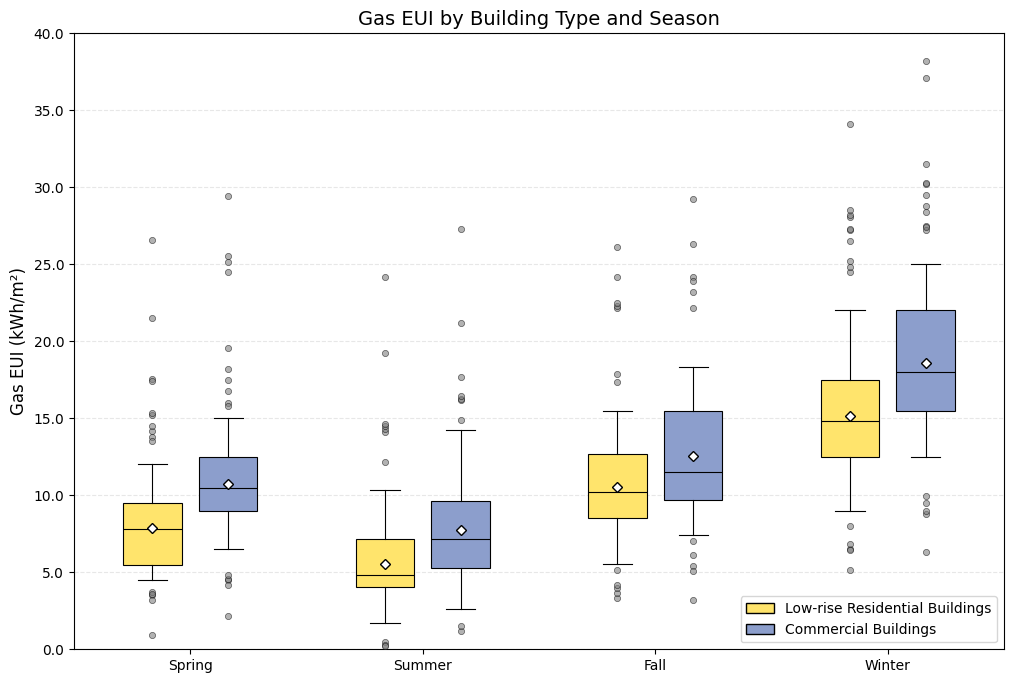


SUMMARY STATISTICS
Residential Annual Avg: 9.40 kWh/m²
Commercial Annual Avg:  12.70 kWh/m²
Difference: 3.30 (35.1% higher)

Seasonal Variation:
  Residential: Winter is 4.2x higher than Summer
  Commercial:  Winter is 3.4x higher than Summer

Total outliers — Residential: 61, Commercial: 65


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# ==============================
# STEP 1: READ THE EXCEL FILE
# ==============================

# Your Excel file name
excel_file = "/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/EUI/Building Types/Building Gas EUI.xlsx"

# Read with multi-level headers (Row 1 = type, Row 2 = season)
df = pd.read_excel(excel_file, header=[0, 1])

# Drop completely empty rows (if any)
df = df.dropna(how='all')

# ==============================
# STEP 2: BUILD DATA DICTIONARIES
# ==============================

# Prepare structure
seasonal_data = {}
outliers = {}

# Extract unique seasons and building types
seasons = df.columns.get_level_values(1).unique().tolist()
building_types = df.columns.get_level_values(0).unique().tolist()

# Fill the dictionaries
for season in seasons:
    seasonal_data[season] = {}
    outliers[season] = {}
    for btype in building_types:
        # Get numeric values from that column
        vals = df[(btype, season)].dropna().tolist()
        
        # First 5 are main boxplot data, rest are outliers (as per your structure)
        main_data = vals[:5]
        outlier_data = vals[5:]
        
        seasonal_data[season][btype] = main_data
        outliers[season][btype] = outlier_data

# ==============================
# STEP 3: CREATE BOXPLOTS
# ==============================

fig, ax = plt.subplots(figsize=(12, 8))

residential_data = []
commercial_data = []
residential_outliers = []
commercial_outliers = []
positions_residential = []
positions_commercial = []

season_centers = [1, 3, 5, 7]
box_width = 0.5
box_spacing = 0.15

# Enforce consistent order
ordered_seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for i, season in enumerate(ordered_seasons):
    res_data = seasonal_data[season]['Residential']
    com_data = seasonal_data[season]['Commercial']
    residential_data.append(res_data)
    commercial_data.append(com_data)
    residential_outliers.append(outliers[season]['Residential'])
    commercial_outliers.append(outliers[season]['Commercial'])
    
    pos_res = season_centers[i] - box_width/2 - box_spacing/2
    pos_com = season_centers[i] + box_width/2 + box_spacing/2
    positions_residential.append(pos_res)
    positions_commercial.append(pos_com)

# Residential boxplot
bp1 = ax.boxplot(residential_data, positions=positions_residential, widths=box_width,
                 patch_artist=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                 medianprops=dict(color='black', linewidth=0.4),
                 boxprops=dict(linewidth=0.8),
                 whiskerprops=dict(linewidth=0.8),
                 capprops=dict(linewidth=0.8),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5),
                 whis=[0, 100], manage_ticks=False)

# Commercial boxplot
bp2 = ax.boxplot(commercial_data, positions=positions_commercial, widths=box_width,
                 patch_artist=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=5),
                 medianprops=dict(color='black', linewidth=0.4),
                 boxprops=dict(linewidth=0.8),
                 whiskerprops=dict(linewidth=0.8),
                 capprops=dict(linewidth=0.8),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5),
                 whis=[0, 100], manage_ticks=False)

# Add outliers manually
for i in range(len(ordered_seasons)):
    if residential_outliers[i]:
        ax.scatter([positions_residential[i]] * len(residential_outliers[i]),
                   residential_outliers[i], color='gray', alpha=0.6, s=20,
                   zorder=3, edgecolors='black', linewidths=0.5)
    if commercial_outliers[i]:
        ax.scatter([positions_commercial[i]] * len(commercial_outliers[i]),
                   commercial_outliers[i], color='gray', alpha=0.6, s=20,
                   zorder=3, edgecolors='black', linewidths=0.5)

# Colors and style
for patch in bp1['boxes']:
    patch.set_facecolor('#ffe46c')
for patch in bp2['boxes']:
    patch.set_facecolor('#8c9ecc')

ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(season_centers)
ax.set_xticklabels(ordered_seasons)
ax.set_ylabel('Gas EUI (kWh/m²)', fontsize=12)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_title('Gas EUI by Building Type and Season', fontsize=14)

legend_elements = [
    Patch(facecolor='#ffe46c', edgecolor='black', label='Low-rise Residential Buildings'),
    Patch(facecolor='#8c9ecc', edgecolor='black', label='Commercial Buildings')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, fancybox=True)

plt.savefig('Gas_eui_building_types.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# STEP 4: PRINT STATISTICS
# ==============================

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

res_annual_avg = np.mean([np.median(seasonal_data[s]['Residential']) for s in ordered_seasons])
com_annual_avg = np.mean([np.median(seasonal_data[s]['Commercial']) for s in ordered_seasons])

print(f"Residential Annual Avg: {res_annual_avg:.2f} kWh/m²")
print(f"Commercial Annual Avg:  {com_annual_avg:.2f} kWh/m²")
print(f"Difference: {com_annual_avg - res_annual_avg:.2f} ({((com_annual_avg - res_annual_avg)/res_annual_avg)*100:.1f}% higher)")

winter_res = np.median(seasonal_data['Winter']['Residential'])
summer_res = np.median(seasonal_data['Summer']['Residential'])
winter_com = np.median(seasonal_data['Winter']['Commercial'])
summer_com = np.median(seasonal_data['Summer']['Commercial'])

print("\nSeasonal Variation:")
print(f"  Residential: Winter is {winter_res/summer_res:.1f}x higher than Summer")
print(f"  Commercial:  Winter is {winter_com/summer_com:.1f}x higher than Summer")

total_res_outliers = sum(len(outliers[s]['Residential']) for s in ordered_seasons)
total_com_outliers = sum(len(outliers[s]['Commercial']) for s in ordered_seasons)
print(f"\nTotal outliers — Residential: {total_res_outliers}, Commercial: {total_com_outliers}")

